In [1]:
%matplotlib inline
#!pip install python-dotenv
#!pip install pydot
import os

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import librosa
import librosa.display
import missingno as msno
from dython import nominal

import utils

plt.rcParams['figure.figsize'] = (17, 5)

In [2]:
tracks = utils.load('data/fma_metadata/tracks.csv')

tracks.shape

(106574, 52)

In [3]:
tracks.head()


album                                                          \
         comments        date_created date_released engineer favorites id   
track_id                                                                    
2               0 2008-11-26 01:44:45    2009-01-05      NaN         4  1   
3               0 2008-11-26 01:44:45    2009-01-05      NaN         4  1   
5               0 2008-11-26 01:44:45    2009-01-05      NaN         4  1   
10              0 2008-11-26 01:45:08    2008-02-06      NaN         4  6   
20              0 2008-11-26 01:45:05    2009-01-06      NaN         2  4   

                                                                           \
                                        information listens producer tags   
track_id                                                                    
2                                           <p></p>    6073      NaN   []   
3                                           <p></p>    6073      NaN   []   
5                                           <p></p>    6073      NaN   []   
10                                              NaN   47632      NaN   []   
20        <p> "spiritual songs" from Nicky Cook</p>    2710      NaN   []   

          ...       track                         \
          ... information interest language_code   
track_id  ...                                      
2         ...         NaN     4656            en   
3         ...         NaN     1470            en   
5         ...         NaN     1933            en   
10        ...         NaN    54881            en   
20        ...         NaN      978            en   

                                                                              \
                                                    license listens lyricist   
track_id                                                                       
2         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1293      NaN   
3         Attribution-NonCommercial-ShareAlike 3.0 Inter...     514      NaN   
5         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1151      NaN   
10        Attribution-NonCommercial-NoDerivatives (aka M...   50135      NaN   
20        Attribution-NonCommercial-NoDerivatives (aka M...     361      NaN   

                                                 
         number publisher tags            title  
track_id                                         
2             3       NaN   []             Food  
3             4       NaN   []     Electric Ave  
5             6       NaN   []       This World  
10            1       NaN   []          Freeway  
20            3       NaN   []  Spiritual Level  

[5 rows x 52 columns]

In [4]:
tracks.isnull().sum() 

album   comments                  0
        date_created           3529
        date_released         36280
        engineer              91279
        favorites                 0
        id                        0
        information           23425
        listens                   0
        producer              88514
        tags                      0
        title                  1025
        tracks                    0
        type                   6508
artist  active_year_begin     83863
        active_year_end      101199
        associated_labels     92303
        bio                   35418
        comments                  0
        date_created            856
        favorites                 0
        id                        0
        latitude              62030
        location              36364
        longitude             62030
        members               59725
        name                      0
        related_projects      93422
        tags                

## ELIMINO GLI ATTRIBUTO CON PIU' DI 100 MILA NULL VALUE

In [5]:
tracks=tracks.drop([('track', 'lyricist'),('track', 'publisher'),('track', 'information'),('track', 'composer'),
                    ('track', 'date_recorded'), ('artist', 'active_year_end'),  ('artist', 'wikipedia_page')], axis = 1)

## ELIMINO GLI ATTRIBUTI CHE NON RITENGO UTILI

In [6]:

tracks=tracks.drop([('set', 'split'), ('artist', 'website'),  ('artist', 'bio')], axis = 1)

In [7]:
tracks.isnull().sum() 


album   comments                 0
        date_created          3529
        date_released        36280
        engineer             91279
        favorites                0
        id                       0
        information          23425
        listens                  0
        producer             88514
        tags                     0
        title                 1025
        tracks                   0
        type                  6508
artist  active_year_begin    83863
        associated_labels    92303
        comments                 0
        date_created           856
        favorites                0
        id                       0
        latitude             62030
        location             36364
        longitude            62030
        members              59725
        name                     0
        related_projects     93422
        tags                     0
set     subset                   0
track   bit_rate                 0
        comments    

## 16341 id artist, 106574 track, 14854 id album (1025 record con id album = -1)

In [8]:
mediumSet=tracks.loc[tracks[('set','subset')] != 'large']

In [9]:
mediumSet

album                                                              \
         comments        date_created date_released        engineer favorites   
track_id                                                                        
2               0 2008-11-26 01:44:45    2009-01-05             NaN         4   
3               0 2008-11-26 01:44:45    2009-01-05             NaN         4   
5               0 2008-11-26 01:44:45    2009-01-05             NaN         4   
10              0 2008-11-26 01:45:08    2008-02-06             NaN         4   
134             0 2008-11-26 01:44:45    2009-01-05             NaN         4   
...           ...                 ...           ...             ...       ...   
155297          0 2017-03-30 09:50:32    2017-03-30             NaN         1   
155298          0 2017-03-30 10:45:13           NaT             NaN         0   
155306          0 2017-03-30 10:45:13           NaT             NaN         0   
155307          0 2017-03-30 12:51:05    2017-03-27  Scott Williams         0   
155314          0 2017-03-30 15:20:35    2017-02-17             NaN         0   

                                                                            \
             id                                        information listens   
track_id                                                                     
2             1                                            <p></p>    6073   
3             1                                            <p></p>    6073   
5             1                                            <p></p>    6073   
10            6                                                NaN   47632   
134           1                                            <p></p>    6073   
...         ...                                                ...     ...   
155297    22935  <p>The stars will show you the way in this unp...    6196   
155298    22936                                                NaN    2454   
155306    22936                                                NaN    2454   
155307    22937  <p>Scott welcomes Russian revolutionary avant ...    1206   
155314    22940  <p>A live performance at Monty Hall on Feb 17,...    1506   

                               ...         track                   \
                producer tags  ...     genre_top           genres   
track_id                       ...                                  
2                    NaN   []  ...       Hip-Hop             [21]   
3                    NaN   []  ...       Hip-Hop             [21]   
5                    NaN   []  ...       Hip-Hop             [21]   
10                   NaN   []  ...           Pop             [10]   
134                  NaN   []  ...       Hip-Hop             [21]   
...                  ...  ...  ...           ...              ...   
155297               NaN   []  ...  Instrumental  [18, 107, 1235]   
155298               NaN   []  ...          Folk        [17, 103]   
155306               NaN   []  ...          Folk        [17, 103]   
155307    Scott Williams   []  ...  Experimental              [1]   
155314       Monty Hall    []  ...          Rock             [25]   

                                                  \
               genres_all interest language_code   
track_id                                           
2                    [21]     4656            en   
3                    [21]     1470            en   
5                    [21]     1933            en   
10                   [10]    54881            en   
134                  [21]     1126            en   
...                   ...      ...           ...   
155297    [107, 18, 1235]     1463           NaN   
155298          [17, 103]      706           NaN   
155306          [17, 103]      497           NaN   
155307            [1, 38]      630           NaN   
155314           [25, 12]      778           NaN   

                                                                            \
          

In [10]:
mediumSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 2 to 155314
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   (album, comments)            25000 non-null  int64         
 1   (album, date_created)        25000 non-null  datetime64[ns]
 2   (album, date_released)       17092 non-null  datetime64[ns]
 3   (album, engineer)            4493 non-null   object        
 4   (album, favorites)           25000 non-null  int64         
 5   (album, id)                  25000 non-null  int64         
 6   (album, information)         20284 non-null  category      
 7   (album, listens)             25000 non-null  int64         
 8   (album, producer)            4976 non-null   object        
 9   (album, tags)                25000 non-null  object        
 10  (album, title)               25000 non-null  object        
 11  (album, tracks)              25000 non-n

In [11]:
mediumSet.isnull().sum() 

album   comments                 0
        date_created             0
        date_released         7908
        engineer             20507
        favorites                0
        id                       0
        information           4716
        listens                  0
        producer             20024
        tags                     0
        title                    0
        tracks                   0
        type                   663
artist  active_year_begin    20289
        associated_labels    22247
        comments                 0
        date_created             0
        favorites                0
        id                       0
        latitude             15057
        location              8019
        longitude            15057
        members              13932
        name                     0
        related_projects     22786
        tags                     0
set     subset                   0
track   bit_rate                 0
        comments    

In [12]:
smallSet=tracks.loc[tracks[('set','subset')] == 'small']

In [13]:
smallSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 2 to 155066
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   (album, comments)            8000 non-null   int64         
 1   (album, date_created)        8000 non-null   datetime64[ns]
 2   (album, date_released)       5337 non-null   datetime64[ns]
 3   (album, engineer)            1142 non-null   object        
 4   (album, favorites)           8000 non-null   int64         
 5   (album, id)                  8000 non-null   int64         
 6   (album, information)         6502 non-null   category      
 7   (album, listens)             8000 non-null   int64         
 8   (album, producer)            1404 non-null   object        
 9   (album, tags)                8000 non-null   object        
 10  (album, title)               8000 non-null   object        
 11  (album, tracks)              8000 non-nul

In [14]:
smallSet.isnull().sum() 

album   comments                0
        date_created            0
        date_released        2663
        engineer             6858
        favorites               0
        id                      0
        information          1498
        listens                 0
        producer             6596
        tags                    0
        title                   0
        tracks                  0
        type                  231
artist  active_year_begin    6458
        associated_labels    7151
        comments                0
        date_created            0
        favorites               0
        id                      0
        latitude             5101
        location             2529
        longitude            5101
        members              4475
        name                    0
        related_projects     7306
        tags                    0
set     subset                  0
track   bit_rate                0
        comments                0
        date_c

## ELIMINO ATTRIBUTI CHE PRESENTANO MOLTI NULL VALUE SU TUTTI I SOTTOINSIEMI

In [15]:
tracks=tracks.drop([('track', 'language_code'),('artist', 'related_projects'),('artist', 'associated_labels'),('artist', 'active_year_begin'),
                    ('album', 'producer'), ('album', 'engineer')], axis = 1)

In [16]:
tracks.isnull().sum() 

album   comments             0
        date_created      3529
        date_released    36280
        favorites            0
        id                   0
        information      23425
        listens              0
        tags                 0
        title             1025
        tracks               0
        type              6508
artist  comments             0
        date_created       856
        favorites            0
        id                   0
        latitude         62030
        location         36364
        longitude        62030
        members          59725
        name                 0
        tags                 0
set     subset               0
track   bit_rate             0
        comments             0
        date_created         0
        duration             0
        favorites            0
        genre_top        56976
        genres               0
        genres_all           0
        interest             0
        license             87
        

In [17]:
tracks=tracks.drop([('artist', 'longitude'),('artist', 'latitude')], axis = 1)

In [18]:
tracks.isnull().sum() 

album   comments             0
        date_created      3529
        date_released    36280
        favorites            0
        id                   0
        information      23425
        listens              0
        tags                 0
        title             1025
        tracks               0
        type              6508
artist  comments             0
        date_created       856
        favorites            0
        id                   0
        location         36364
        members          59725
        name                 0
        tags                 0
set     subset               0
track   bit_rate             0
        comments             0
        date_created         0
        duration             0
        favorites            0
        genre_top        56976
        genres               0
        genres_all           0
        interest             0
        license             87
        listens              0
        number               0
        

In [19]:
tracks=tracks.drop([('album', 'information')], axis = 1)

In [20]:
tracks=tracks.drop([('artist', 'members')], axis = 1)

In [21]:
tracks.isnull().sum() 

album   comments             0
        date_created      3529
        date_released    36280
        favorites            0
        id                   0
        listens              0
        tags                 0
        title             1025
        tracks               0
        type              6508
artist  comments             0
        date_created       856
        favorites            0
        id                   0
        location         36364
        name                 0
        tags                 0
set     subset               0
track   bit_rate             0
        comments             0
        date_created         0
        duration             0
        favorites            0
        genre_top        56976
        genres               0
        genres_all           0
        interest             0
        license             87
        listens              0
        number               0
        tags                 0
        title                1
dtype: i

In [22]:
tracks=tracks.drop([('album', 'date_created'),('artist', 'date_created'),('track', 'date_created')], axis = 1)

In [23]:
tracks.isnull().sum() 

album   comments             0
        date_released    36280
        favorites            0
        id                   0
        listens              0
        tags                 0
        title             1025
        tracks               0
        type              6508
artist  comments             0
        favorites            0
        id                   0
        location         36364
        name                 0
        tags                 0
set     subset               0
track   bit_rate             0
        comments             0
        duration             0
        favorites            0
        genre_top        56976
        genres               0
        genres_all           0
        interest             0
        license             87
        listens              0
        number               0
        tags                 0
        title                1
dtype: int64

In [24]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106574 entries, 2 to 155320
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   (album, comments)       106574 non-null  int64         
 1   (album, date_released)  70294 non-null   datetime64[ns]
 2   (album, favorites)      106574 non-null  int64         
 3   (album, id)             106574 non-null  int64         
 4   (album, listens)        106574 non-null  int64         
 5   (album, tags)           106574 non-null  object        
 6   (album, title)          105549 non-null  object        
 7   (album, tracks)         106574 non-null  int64         
 8   (album, type)           100066 non-null  category      
 9   (artist, comments)      106574 non-null  int64         
 10  (artist, favorites)     106574 non-null  int64         
 11  (artist, id)            106574 non-null  int64         
 12  (artist, location)      70210 

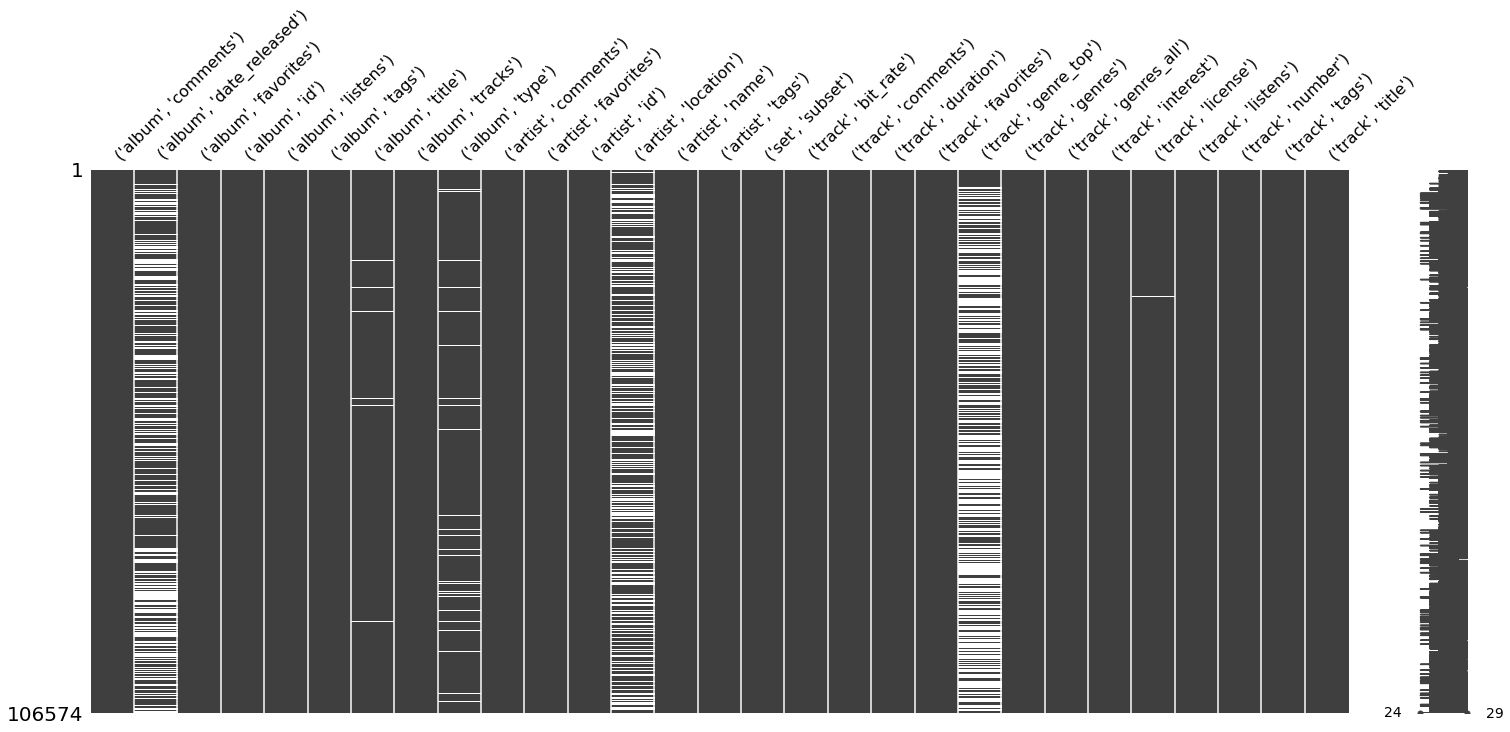

In [25]:
msno.matrix(tracks)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]),
 <a list of 15 Text major ticklabel objects>)

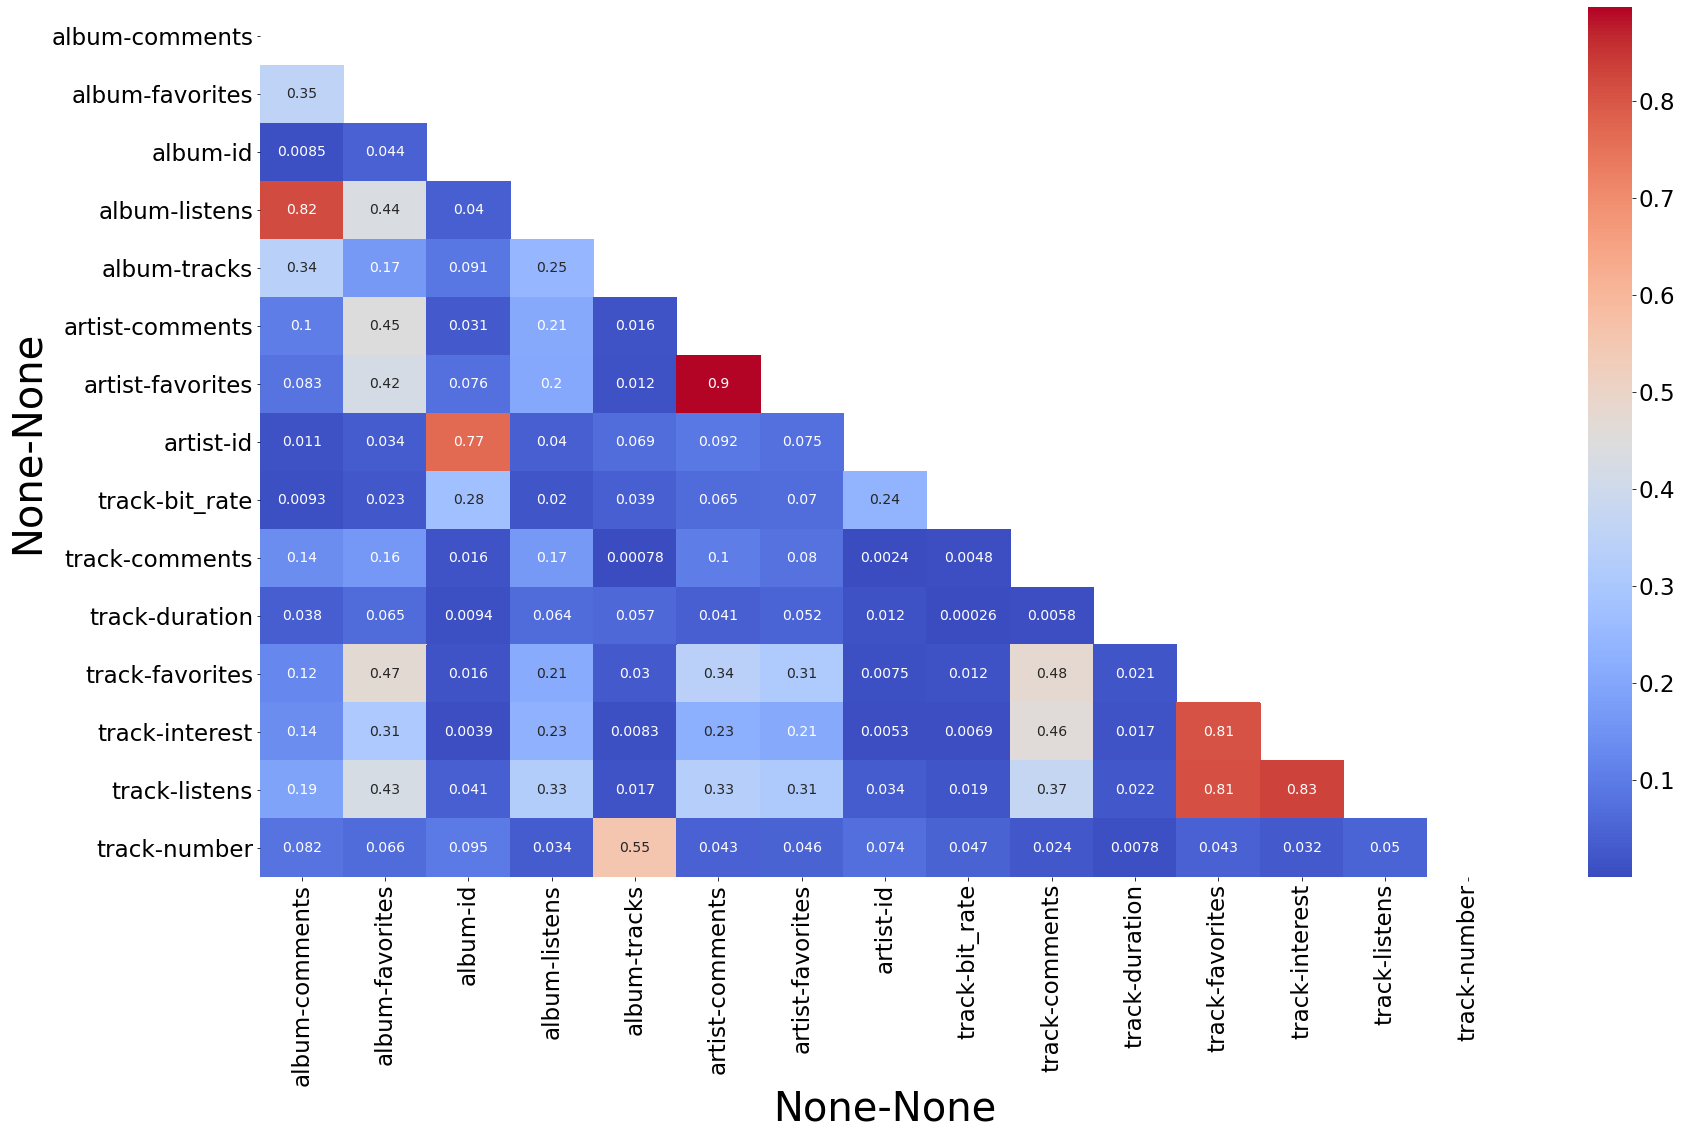

In [26]:
SMALL_SIZE = 23
MEDIUM_SIZE = 40
BIGGER_SIZE = 45

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(28,16))
#plt.yticks(rotation=0) 
corr=tracks.corr()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr.abs(),annot=True,cmap="coolwarm",mask=mask);
plt.xticks(rotation=90)


In [27]:
tracks.isnull().sum() 

album   comments             0
        date_released    36280
        favorites            0
        id                   0
        listens              0
        tags                 0
        title             1025
        tracks               0
        type              6508
artist  comments             0
        favorites            0
        id                   0
        location         36364
        name                 0
        tags                 0
set     subset               0
track   bit_rate             0
        comments             0
        duration             0
        favorites            0
        genre_top        56976
        genres               0
        genres_all           0
        interest             0
        license             87
        listens              0
        number               0
        tags                 0
        title                1
dtype: int64

## ANALISI ALBUM

In [28]:
album=tracks['album']

In [29]:
album.isnull().sum() 

comments             0
date_released    36280
favorites            0
id                   0
listens              0
tags                 0
title             1025
tracks               0
type              6508
dtype: int64

In [30]:
ALBUM_UNIQUE=album.drop(['tags'],axis = 1)
ALBUM_UNIQUE=ALBUM_UNIQUE.drop_duplicates()
ALBUM_UNIQUE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14854 entries, 2 to 155314
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   comments       14854 non-null  int64         
 1   date_released  9450 non-null   datetime64[ns]
 2   favorites      14854 non-null  int64         
 3   id             14854 non-null  int64         
 4   listens        14854 non-null  int64         
 5   title          14853 non-null  object        
 6   tracks         14854 non-null  int64         
 7   type           13940 non-null  category      
dtypes: category(1), datetime64[ns](1), int64(5), object(1)
memory usage: 943.1+ KB


In [31]:
ALBUM_UNIQUE.isnull().sum() 

comments            0
date_released    5404
favorites           0
id                  0
listens             0
title               1
tracks              0
type              914
dtype: int64

## TRACK CON ALBUM ID = -1, NON HANNO ALBUM E SONO 1025. MANCANO ANCHE TUTTI GLI ALTRI VALUE SU ALBUM, ALCUNI SONO NULL, ALTRI -1  O ARRAY VUOTO

In [32]:
ALBUM_minus_1=tracks.loc[tracks[('album','id')] == -1]
ALBUM_minus_1.tail()

album                                                            \
         comments date_released favorites id listens tags title tracks type   
track_id                                                                      
155060         -1           NaT        -1 -1      -1   []   NaN     -1  NaN   
155061         -1           NaT        -1 -1      -1   []   NaN     -1  NaN   
155244         -1           NaT        -1 -1      -1   []   NaN     -1  NaN   
155248         -1           NaT        -1 -1      -1   []   NaN     -1  NaN   
155288         -1           NaT        -1 -1      -1   []   NaN     -1  NaN   

           artist  ...     track                              \
         comments  ... favorites   genre_top          genres   
track_id           ...                                         
155060          0  ...         5         NaN    [17, 18, 38]   
155061          7  ...         0         NaN              []   
155244          0  ...         6  Electronic  [15, 240, 468]   
155248          2  ...         1         NaN   [15, 27, 240]   
155288          0  ...         0         NaN              []   

                                           \
                      genres_all interest   
track_id                                    
155060        [17, 18, 1235, 38]      980   
155061                        []       41   
155244       [240, 297, 468, 15]     1523   
155248    [297, 12, 15, 240, 27]      964   
155288                        []      277   

                                                                            \
                                                    license listens number   
track_id                                                                     
155060    Attribution-Noncommercial-Share Alike 3.0 Unit...     888      0   
155061    Creative Commons Attribution-NonCommercial-NoD...      36      0   
155244                            Attribution-NonCommercial    1098      0   
155248                               Attribution-ShareAlike     787      0   
155288    Creative Commons Attribution-NonCommercial-NoD...     240      4   

                                                          
         tags                                      title  
track_id                                                  
155060     []                                   quagmire  
155061     []  Dino Felipe-Dead Wild Horses(Audio K MIX)  
155244     []                                     Memory  
155248     []                               Ace of Clubs  
155288     []                                Strasser 60  

[5 rows x 29 columns]

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text major ticklabel objects>)

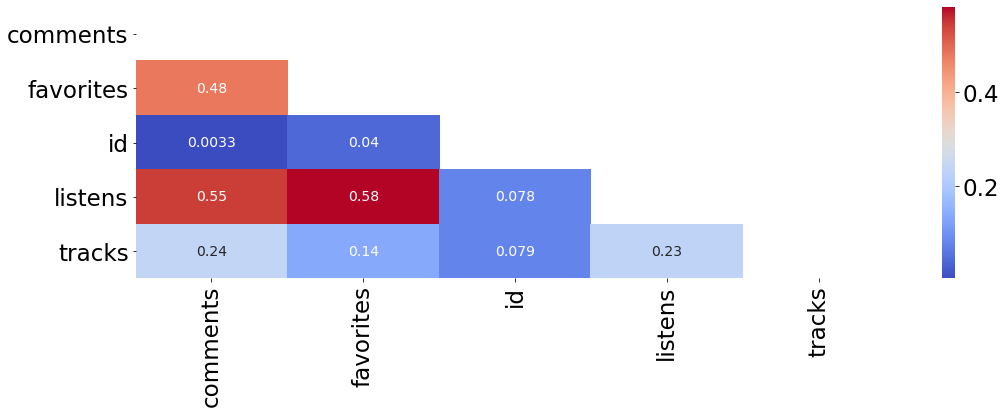

In [33]:
corr=ALBUM_UNIQUE.corr()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr.abs(),annot=True,cmap="coolwarm",mask=mask);
plt.xticks(rotation=90)


## LA CORRELAZIONE VISTA SOPRA TRA COMMENTS E LISTENS E' MOLTO PIU BASSA ANALIZZANDO GLI ALBUM SENZA RIPETIZIONI

In [34]:
ALBUM_UNIQUE['listens'].value_counts()

-1        459
 735        7
 3142       7
 695        7
 946        7
         ... 
 16123      1
 22270      1
 7935       1
 9984       1
 37804      1
Name: listens, Length: 10092, dtype: int64

In [35]:
ALBUM_listens_7935=tracks.loc[tracks[('album','listens')] == 7935].reset_index()
ALBUM_listens_7935.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   (track_id, )            13 non-null     int64         
 1   (album, comments)       13 non-null     int64         
 2   (album, date_released)  13 non-null     datetime64[ns]
 3   (album, favorites)      13 non-null     int64         
 4   (album, id)             13 non-null     int64         
 5   (album, listens)        13 non-null     int64         
 6   (album, tags)           13 non-null     object        
 7   (album, title)          13 non-null     object        
 8   (album, tracks)         13 non-null     int64         
 9   (album, type)           13 non-null     category      
 10  (artist, comments)      13 non-null     int64         
 11  (artist, favorites)     13 non-null     int64         
 12  (artist, id)            13 non-null     int64       

In [36]:
sum_listens_track=0
for i in range(0,13):
    sum_listens_track=sum_listens_track + ALBUM_listens_7935[('track','listens')][i]
    
sum_listens_track

7970

In [37]:
ALBUM_listens_9984=tracks.loc[tracks[('album','listens')] == 9984].reset_index()
ALBUM_listens_9984.head()
ALBUM_listens_9984.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   (track_id, )            9 non-null      int64         
 1   (album, comments)       9 non-null      int64         
 2   (album, date_released)  0 non-null      datetime64[ns]
 3   (album, favorites)      9 non-null      int64         
 4   (album, id)             9 non-null      int64         
 5   (album, listens)        9 non-null      int64         
 6   (album, tags)           9 non-null      object        
 7   (album, title)          9 non-null      object        
 8   (album, tracks)         9 non-null      int64         
 9   (album, type)           9 non-null      category      
 10  (artist, comments)      9 non-null      int64         
 11  (artist, favorites)     9 non-null      int64         
 12  (artist, id)            9 non-null      int64         

In [38]:
sum_listens_track=0
for i in range(0,9):
    sum_listens_track=sum_listens_track + ALBUM_listens_9984[('track','listens')][i]
    
sum_listens_track

10073

In [39]:
ALBUM_listens_735=tracks.loc[tracks[('album','listens')] == 735].reset_index()
ALBUM_listens_735.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   (track_id, )            23 non-null     int64         
 1   (album, comments)       23 non-null     int64         
 2   (album, date_released)  12 non-null     datetime64[ns]
 3   (album, favorites)      23 non-null     int64         
 4   (album, id)             23 non-null     int64         
 5   (album, listens)        23 non-null     int64         
 6   (album, tags)           23 non-null     object        
 7   (album, title)          23 non-null     object        
 8   (album, tracks)         23 non-null     int64         
 9   (album, type)           23 non-null     category      
 10  (artist, comments)      23 non-null     int64         
 11  (artist, favorites)     23 non-null     int64         
 12  (artist, id)            23 non-null     int64       

In [40]:
sum_listens_track=0
for i in range(0,23):
    sum_listens_track=sum_listens_track + ALBUM_listens_735[('track','listens')][i]
    
sum_listens_track

5203

In [41]:
735*7

5145

In [42]:
ALBUM_listens_3142=tracks.loc[tracks[('album','listens')] == 3142].reset_index()
ALBUM_listens_3142.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   (track_id, )            47 non-null     int64         
 1   (album, comments)       47 non-null     int64         
 2   (album, date_released)  33 non-null     datetime64[ns]
 3   (album, favorites)      47 non-null     int64         
 4   (album, id)             47 non-null     int64         
 5   (album, listens)        47 non-null     int64         
 6   (album, tags)           47 non-null     object        
 7   (album, title)          47 non-null     object        
 8   (album, tracks)         47 non-null     int64         
 9   (album, type)           33 non-null     category      
 10  (artist, comments)      47 non-null     int64         
 11  (artist, favorites)     47 non-null     int64         
 12  (artist, id)            47 non-null     int64       

In [43]:
sum_listens_track=0
for i in range(0,47):
    sum_listens_track=sum_listens_track + ALBUM_listens_3142[('track','listens')][i]
    
sum_listens_track 

21832

In [44]:
3142*7

21994

## dalle analisi fatte sembra che il valore di listens su album sia sempre simile ma minore  del valore della somma di listens di track per le track dello stesso album

In [45]:
ALBUM_UNIQUE['comments'].value_counts()

 0     12553
 1      1223
-1       459
 2       305
 3       143
 4        63
 6        34
 5        31
 7        12
 10        7
 8         7
 9         6
 11        4
 17        3
 12        1
 13        1
 53        1
 14        1
Name: comments, dtype: int64

In [46]:
ALBUM_comments_13=tracks.loc[tracks[('album','comments')] == 13].reset_index()
ALBUM_comments_13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   (track_id, )            9 non-null      int64         
 1   (album, comments)       9 non-null      int64         
 2   (album, date_released)  9 non-null      datetime64[ns]
 3   (album, favorites)      9 non-null      int64         
 4   (album, id)             9 non-null      int64         
 5   (album, listens)        9 non-null      int64         
 6   (album, tags)           9 non-null      object        
 7   (album, title)          9 non-null      object        
 8   (album, tracks)         9 non-null      int64         
 9   (album, type)           9 non-null      category      
 10  (artist, comments)      9 non-null      int64         
 11  (artist, favorites)     9 non-null      int64         
 12  (artist, id)            9 non-null      int64         

In [47]:
sum_comments_track=0
for i in range(0,9):
    sum_listens_track=sum_listens_track + ALBUM_comments_13[('track','comments')][i]
    
sum_comments_track 

0

In [48]:
ALBUM_comments_13.head()

track_id    album                                                   \
           comments date_released favorites     id  listens     tags   
0    97146       13    2014-01-02        60  15736  1363291  [piano]   
1    97147       13    2014-01-02        60  15736  1363291  [piano]   
2    97148       13    2014-01-02        60  15736  1363291  [piano]   
3    97149       13    2014-01-02        60  15736  1363291  [piano]   
4    97150       13    2014-01-02        60  15736  1363291  [piano]   

                            ...     track                                      \
       title tracks   type  ... favorites genre_top                    genres   
0  Cylinders     18  Album  ...       267       NaN  [18, 42, 107, 456, 1235]   
1  Cylinders     18  Album  ...       100       NaN  [18, 42, 107, 456, 1235]   
2  Cylinders     18  Album  ...       211       NaN  [18, 42, 107, 456, 1235]   
3  Cylinders     18  Album  ...       123       NaN  [18, 42, 107, 456, 1235]   
4  Cylinders     18  Album  ...       142       NaN  [18, 42, 107, 456, 1235]   

                                                                          \
                         genres_all interest      license listens number   
0  [38, 456, 42, 107, 15, 18, 1235]   330648  Attribution  262562      1   
1  [38, 456, 42, 107, 15, 18, 1235]    94679  Attribution   83831      2   
2  [38, 456, 42, 107, 15, 18, 1235]   237050  Attribution  212769      3   
3  [38, 456, 42, 107, 15, 18, 1235]    88181  Attribution   76155      4   
4  [38, 456, 42, 107, 15, 18, 1235]   135086  Attribution  116985      5   

                            
      tags           title  
0  [piano]    Cylinder One  
1  [piano]    Cylinder Two  
2  [piano]  Cylinder Three  
3  [piano]   Cylinder Four  
4  [piano]   Cylinder Five  

[5 rows x 30 columns]

In [49]:
ALBUM_comments_13.tail()

track_id    album                                                   \
           comments date_released favorites     id  listens     tags   
4    97150       13    2014-01-02        60  15736  1363291  [piano]   
5    97151       13    2014-01-02        60  15736  1363291  [piano]   
6    97152       13    2014-01-02        60  15736  1363291  [piano]   
7    97153       13    2014-01-02        60  15736  1363291  [piano]   
8    97154       13    2014-01-02        60  15736  1363291  [piano]   

                            ...     track                                      \
       title tracks   type  ... favorites genre_top                    genres   
4  Cylinders     18  Album  ...       142       NaN  [18, 42, 107, 456, 1235]   
5  Cylinders     18  Album  ...       318       NaN  [18, 42, 107, 456, 1235]   
6  Cylinders     18  Album  ...        88       NaN  [18, 42, 107, 456, 1235]   
7  Cylinders     18  Album  ...       190       NaN  [18, 42, 107, 456, 1235]   
8  Cylinders     18  Album  ...       432       NaN  [18, 42, 107, 456, 1235]   

                                                                          \
                         genres_all interest      license listens number   
4  [38, 456, 42, 107, 15, 18, 1235]   135086  Attribution  116985      5   
5  [38, 456, 42, 107, 15, 18, 1235]   219285  Attribution  182079      6   
6  [38, 456, 42, 107, 15, 18, 1235]   101805  Attribution   90785      7   
7  [38, 456, 42, 107, 15, 18, 1235]   167443  Attribution  143366      8   
8  [38, 456, 42, 107, 15, 18, 1235]   384827  Attribution  332986      9   

                            
      tags           title  
4  [piano]   Cylinder Five  
5  [piano]    Cylinder Six  
6  [piano]  Cylinder Seven  
7  [piano]  Cylinder Eight  
8  [piano]   Cylinder Nine  

[5 rows x 30 columns]

In [50]:
a=tracks.loc[tracks[('album','id')] == 15736].reset_index()
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   (track_id, )            9 non-null      int64         
 1   (album, comments)       9 non-null      int64         
 2   (album, date_released)  9 non-null      datetime64[ns]
 3   (album, favorites)      9 non-null      int64         
 4   (album, id)             9 non-null      int64         
 5   (album, listens)        9 non-null      int64         
 6   (album, tags)           9 non-null      object        
 7   (album, title)          9 non-null      object        
 8   (album, tracks)         9 non-null      int64         
 9   (album, type)           9 non-null      category      
 10  (artist, comments)      9 non-null      int64         
 11  (artist, favorites)     9 non-null      int64         
 12  (artist, id)            9 non-null      int64         

In [51]:
ALBUM_comments_11=tracks.loc[tracks[('album','comments')] == 11].reset_index()
ALBUM_comments_11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   (track_id, )            125 non-null    int64         
 1   (album, comments)       125 non-null    int64         
 2   (album, date_released)  120 non-null    datetime64[ns]
 3   (album, favorites)      125 non-null    int64         
 4   (album, id)             125 non-null    int64         
 5   (album, listens)        125 non-null    int64         
 6   (album, tags)           125 non-null    object        
 7   (album, title)          125 non-null    object        
 8   (album, tracks)         125 non-null    int64         
 9   (album, type)           125 non-null    category      
 10  (artist, comments)      125 non-null    int64         
 11  (artist, favorites)     125 non-null    int64         
 12  (artist, id)            125 non-null    int64     

In [52]:
sum_listens_track=0
for i in range(0,125):
    sum_listens_track=sum_listens_track + ALBUM_comments_11[('track','comments')][i]
    
sum_listens_track 

14

In [53]:
11*4

44

In [54]:
ALBUM_comments_11.head()

track_id    album                                        \
           comments date_released favorites    id listens   
0    14279       11    2009-01-01        22  3332  154225   
1    14280       11    2009-01-01        22  3332  154225   
2    14281       11    2009-01-01        22  3332  154225   
3    14282       11    2009-01-01        22  3332  154225   
4    14283       11    2009-01-01        22  3332  154225   

                                                      \
                                                tags   
0  [eastern european, gypsy jazz, swing, klezmer,...   
1  [eastern european, gypsy jazz, swing, klezmer,...   
2  [eastern european, gypsy jazz, swing, klezmer,...   
3  [eastern european, gypsy jazz, swing, klezmer,...   
4  [eastern european, gypsy jazz, swing, klezmer,...   

                                                     ...     track            \
                                title tracks   type  ... favorites genre_top   
0  No Money No Honey All We Got Is Us     12  Album  ...        59       NaN   
1  No Money No Honey All We Got Is Us     12  Album  ...        27       NaN   
2  No Money No Honey All We Got Is Us     12  Album  ...        37       NaN   
3  No Money No Honey All We Got Is Us     12  Album  ...        29       NaN   
4  No Money No Honey All We Got Is Us     12  Album  ...        21       NaN   

                                             \
          genres        genres_all interest   
0  [4, 118, 179]  [2, 179, 4, 118]    22418   
1  [4, 118, 179]  [2, 179, 4, 118]    21453   
2  [4, 118, 179]  [2, 179, 4, 118]    20558   
3  [4, 118, 179]  [2, 179, 4, 118]    15412   
4  [4, 118, 179]  [2, 179, 4, 118]    19507   

                                                                     \
                                             license listens number   
0  Attribution-Noncommercial-Share Alike 3.0 Unit...   15752     12   
1  Attribution-Noncommercial-Share Alike 3.0 Unit...   15431      1   
2  Attribution-Noncommercial-Share Alike 3.0 Unit...   12170      2   
3  Attribution-Noncommercial-Share Alike 3.0 Unit...    9140      3   
4  Attribution-Noncommercial-Share Alike 3.0 Unit...   12200      4   

                                                                             
                                                tags                  title  
0  [eastern european, gypsy jazz, swing, klezmer,...  Chosen Kale Mazel Tov  
1  [eastern european, gypsy jazz, swing, klezmer,...              Amari Szi  
2  [eastern european, gypsy jazz, swing, klezmer,...          Blue Draggish  
3  [eastern european, gypsy jazz, swing, klezmer,...            Heiser Zibn  
4  [eastern european, gypsy jazz, swing, klezmer,...              Magdalena  

[5 rows x 30 columns]

In [55]:
ALBUM_comments_11['track']['comments'].value_counts()

0     122
10      1
3       1
1       1
Name: comments, dtype: int64

## dalle analisi fatte sembra che il valore di comments su album sia diverso dal valore della somma di comments di track per le track dello stesso album

In [56]:
ALBUM_UNIQUE['tracks'].value_counts()

1      2179
5      1093
2      1077
6      1061
4      1027
       ... 
170       1
154       1
138       1
98        1
259       1
Name: tracks, Length: 115, dtype: int64

In [57]:
ALBUM_UNIQUE['tracks'].describe()

count    14854.000000
mean         8.195570
std         12.456192
min         -1.000000
25%          2.000000
50%          6.000000
75%         10.000000
max        652.000000
Name: tracks, dtype: float64

In [58]:
ALBUM_tracks_170=tracks.loc[tracks[('album','tracks')] == 170].reset_index()
ALBUM_tracks_170

track_id    album                                         \
             comments date_released favorites     id listens   
0     146179        0    2014-01-17         0  21841   70247   
1     146180        0    2014-01-17         0  21841   70247   
2     146181        0    2014-01-17         0  21841   70247   
3     146182        0    2014-01-17         0  21841   70247   
4     146183        0    2014-01-17         0  21841   70247   
..       ...      ...           ...       ...    ...     ...   
145   146417        0    2014-01-17         0  21841   70247   
146   146418        0    2014-01-17         0  21841   70247   
147   146419        0    2014-01-17         0  21841   70247   
148   146420        0    2014-01-17         0  21841   70247   
149   146422        0    2014-01-17         0  21841   70247   

                                                                          \
                                                  tags             title   
0    [all styles experimental, harsh noise, not nor...  Necktar Volume 6   
1    [all styles experimental, harsh noise, not nor...  Necktar Volume 6   
2    [all styles experimental, harsh noise, not nor...  Necktar Volume 6   
3    [all styles experimental, harsh noise, not nor...  Necktar Volume 6   
4    [all styles experimental, harsh noise, not nor...  Necktar Volume 6   
..                                                 ...               ...   
145  [all styles experimental, harsh noise, not nor...  Necktar Volume 6   
146  [all styles experimental, harsh noise, not nor...  Necktar Volume 6   
147  [all styles experimental, harsh noise, not nor...  Necktar Volume 6   
148  [all styles experimental, harsh noise, not nor...  Necktar Volume 6   
149  [all styles experimental, harsh noise, not nor...  Necktar Volume 6   

                   ...     track                                    \
    tracks   type  ... favorites genre_top                  genres   
0      170  Album  ...         0       NaN  [15, 32, 38, 41, 1235]   
1      170  Album  ...         0       NaN  [15, 32, 38, 41, 1235]   
2      170  Album  ...         0       NaN  [15, 32, 38, 41, 1235]   
3      170  Album  ...         0       NaN  [15, 32, 38, 41, 1235]   
4      170  Album  ...         0       NaN  [15, 32, 38, 41, 1235]   
..     ...    ...  ...       ...       ...                     ...   
145    170  Album  ...         0       NaN        [15, 32, 38, 41]   
146    170  Album  ...         1       NaN        [15, 32, 38, 41]   
147    170  Album  ...         0       NaN        [15, 32, 38, 41]   
148    170  Album  ...         0       NaN        [15, 32, 38, 41]   
149    170  Album  ...         2       NaN        [15, 32, 38, 41]   

                                      \
                 genres_all interest   
0    [32, 38, 41, 15, 1235]      352   
1    [32, 38, 41, 15, 1235]      241   
2    [32, 38, 41, 15, 1235]      233   
3    [32, 38, 41, 15, 1235]      386   
4    [32, 38, 41, 15, 1235]      340   
..                      ...      ...   
145        [32, 41, 38, 15]     1756   
146        [32, 41, 38, 15]     1700   
147        [32, 41, 38, 15]     4254   
148        [32, 41, 38, 15]     1776   
149        [32, 41, 38, 15]     2410   

                                                                       \
                                               license listens number   
0    Creative Commons Attribution-NonCommercial-NoD...     298      1   
1    Creative Commons Attribution-NonCommercial-NoD...     177      2   
2    Creative Commons Attribution-NonCommercial-NoD...     177      3   
3    Creative Commons Attribution-NonCommercial-NoD...     328      4   
4    Creative Commons Attribution-NonCommercial-NoD...     301      5   
..                                                 ...     ...    ...   
145  Creative Commons Attribution-NonCommercial-NoD...    1348    147   
146  Creative Commons Attribution-NonCommercial-NoD...    1518    148   
147  Creative Common

In [59]:
ALBUM_tracks_170.head()

track_id    album                                         \
           comments date_released favorites     id listens   
0   146179        0    2014-01-17         0  21841   70247   
1   146180        0    2014-01-17         0  21841   70247   
2   146181        0    2014-01-17         0  21841   70247   
3   146182        0    2014-01-17         0  21841   70247   
4   146183        0    2014-01-17         0  21841   70247   

                                                                               \
                                                tags             title tracks   
0  [all styles experimental, harsh noise, not nor...  Necktar Volume 6    170   
1  [all styles experimental, harsh noise, not nor...  Necktar Volume 6    170   
2  [all styles experimental, harsh noise, not nor...  Necktar Volume 6    170   
3  [all styles experimental, harsh noise, not nor...  Necktar Volume 6    170   
4  [all styles experimental, harsh noise, not nor...  Necktar Volume 6    170   

          ...     track                                    \
    type  ... favorites genre_top                  genres   
0  Album  ...         0       NaN  [15, 32, 38, 41, 1235]   
1  Album  ...         0       NaN  [15, 32, 38, 41, 1235]   
2  Album  ...         0       NaN  [15, 32, 38, 41, 1235]   
3  Album  ...         0       NaN  [15, 32, 38, 41, 1235]   
4  Album  ...         0       NaN  [15, 32, 38, 41, 1235]   

                                    \
               genres_all interest   
0  [32, 38, 41, 15, 1235]      352   
1  [32, 38, 41, 15, 1235]      241   
2  [32, 38, 41, 15, 1235]      233   
3  [32, 38, 41, 15, 1235]      386   
4  [32, 38, 41, 15, 1235]      340   

                                                                     \
                                             license listens number   
0  Creative Commons Attribution-NonCommercial-NoD...     298      1   
1  Creative Commons Attribution-NonCommercial-NoD...     177      2   
2  Creative Commons Attribution-NonCommercial-NoD...     177      3   
3  Creative Commons Attribution-NonCommercial-NoD...     328      4   
4  Creative Commons Attribution-NonCommercial-NoD...     301      5   

                                                      \
                                                tags   
0  [all styles experimental, harsh noise, not nor...   
1  [all styles experimental, harsh noise, not nor...   
2  [all styles experimental, harsh noise, not nor...   
3  [all styles experimental, harsh noise, not nor...   
4  [all styles experimental, harsh noise, not nor...   

                                                      
                                               title  
0  A Flammable Nitrate the Cameraman Gathers (exc...  
1  Mellow listening for the stereotypically entra...  
2                              Excitation Anarchique  
3                                           Cactus 2  
4                             Alejandro's Revolution  

[5 rows x 30 columns]

In [60]:
ALBUM_tracks_170.tail()

track_id    album                                         \
             comments date_released favorites     id listens   
145   146417        0    2014-01-17         0  21841   70247   
146   146418        0    2014-01-17         0  21841   70247   
147   146419        0    2014-01-17         0  21841   70247   
148   146420        0    2014-01-17         0  21841   70247   
149   146422        0    2014-01-17         0  21841   70247   

                                                                          \
                                                  tags             title   
145  [all styles experimental, harsh noise, not nor...  Necktar Volume 6   
146  [all styles experimental, harsh noise, not nor...  Necktar Volume 6   
147  [all styles experimental, harsh noise, not nor...  Necktar Volume 6   
148  [all styles experimental, harsh noise, not nor...  Necktar Volume 6   
149  [all styles experimental, harsh noise, not nor...  Necktar Volume 6   

                   ...     track                              \
    tracks   type  ... favorites genre_top            genres   
145    170  Album  ...         0       NaN  [15, 32, 38, 41]   
146    170  Album  ...         1       NaN  [15, 32, 38, 41]   
147    170  Album  ...         0       NaN  [15, 32, 38, 41]   
148    170  Album  ...         0       NaN  [15, 32, 38, 41]   
149    170  Album  ...         2       NaN  [15, 32, 38, 41]   

                                \
           genres_all interest   
145  [32, 41, 38, 15]     1756   
146  [32, 41, 38, 15]     1700   
147  [32, 41, 38, 15]     4254   
148  [32, 41, 38, 15]     1776   
149  [32, 41, 38, 15]     2410   

                                                                       \
                                               license listens number   
145  Creative Commons Attribution-NonCommercial-NoD...    1348    147   
146  Creative Commons Attribution-NonCommercial-NoD...    1518    148   
147  Creative Commons Attribution-NonCommercial-NoD...    3834    149   
148  Creative Commons Attribution-NonCommercial-NoD...    1662    150   
149  Creative Commons Attribution-NonCommercial-NoD...    2031    151   

                                                        \
                                                  tags   
145  [all styles experimental, harsh noise, not nor...   
146  [all styles experimental, harsh noise, not nor...   
147  [all styles experimental, harsh noise, not nor...   
148  [all styles experimental, harsh noise, not nor...   
149  [all styles experimental, harsh noise, not nor...   

                                             
                                      title  
145                             Electroaxon  
146  Et de réduire en miettes ces monuments  
147                          Happy Sampling  
148                              Revolusong  
149                     Upheaval Version 46  

[5 rows x 30 columns]

In [61]:
ALBUM_tracks_652=tracks.loc[tracks[('album','tracks')] == 652].reset_index()
ALBUM_tracks_652

track_id    album                                              \
             comments date_released favorites     id listens tags   
0      99875       14    2014-02-28         5  16098   58483   []   
1      99879       14    2014-02-28         5  16098   58483   []   
2      99890       14    2014-02-28         5  16098   58483   []   
3      99891       14    2014-02-28         5  16098   58483   []   
4      99893       14    2014-02-28         5  16098   58483   []   
..       ...      ...           ...       ...    ...     ...  ...   
130   100380       14    2014-02-28         5  16098   58483   []   
131   100381       14    2014-02-28         5  16098   58483   []   
132   100382       14    2014-02-28         5  16098   58483   []   
133   100385       14    2014-02-28         5  16098   58483   []   
134   100386       14    2014-02-28         5  16098   58483   []   

                                                   ...     track  \
                              title tracks   type  ... favorites   
0    Classwar Karaoke - 0025 Survey    652  Album  ...         0   
1    Classwar Karaoke - 0025 Survey    652  Album  ...         0   
2    Classwar Karaoke - 0025 Survey    652  Album  ...         0   
3    Classwar Karaoke - 0025 Survey    652  Album  ...         0   
4    Classwar Karaoke - 0025 Survey    652  Album  ...         0   
..                              ...    ...    ...  ...       ...   
130  Classwar Karaoke - 0025 Survey    652  Album  ...         0   
131  Classwar Karaoke - 0025 Survey    652  Album  ...         0   
132  Classwar Karaoke - 0025 Survey    652  Album  ...         0   
133  Classwar Karaoke - 0025 Survey    652  Album  ...         0   
134  Classwar Karaoke - 0025 Survey    652  Album  ...         1   

                                                                        \
        genre_top                genres            genres_all interest   
0    Experimental  [1, 30, 38, 41, 247]  [1, 38, 41, 247, 30]      841   
1    Experimental  [1, 30, 38, 41, 247]  [1, 38, 41, 247, 30]      536   
2    Experimental  [1, 30, 38, 41, 247]  [1, 38, 41, 247, 30]      952   
3    Experimental  [1, 30, 38, 41, 247]  [1, 38, 41, 247, 30]      426   
4    Experimental  [1, 30, 38, 41, 247]  [1, 38, 41, 247, 30]      366   
..            ...                   ...                   ...      ...   
130  Experimental  [1, 30, 38, 41, 247]  [1, 38, 41, 247, 30]     1403   
131  Experimental  [1, 30, 38, 41, 247]  [1, 38, 41, 247, 30]     1052   
132  Experimental  [1, 30, 38, 41, 247]  [1, 38, 41, 247, 30]     1574   
133  Experimental  [1, 30, 38, 41, 247]  [1, 38, 41, 247, 30]     2039   
134  Experimental  [1, 30, 38, 41, 247]  [1, 38, 41, 247, 30]     4479   

                                                                            \
                                               license listens number tags   
0    Attribution-NonCommercial-ShareAlike 3.0 Inter...     485      1   []   
1    Attribution-NonCommercial-ShareAlike 3.0 Inter...     279      5   []   
2    Attribution-NonCommercial-ShareAlike 3.0 Inter...     204      2   []   
3    Attribution-NonCommercial-ShareAlike 3.0 Inter...     149      3   []   
4    Attribution-NonCommercial-ShareAlike 3.0 Inter...     125      4   []   
..                                                 ...     ...    ...  ...   
130  Attribution-NonCommercial-ShareAlike 3.0 Inter...    1185    135   []   
131  Attribution-NonCommercial-ShareAlike 3.0 Inter...     846    136   []   
132  Attribution-NonCommercial-ShareAlike 3.0 Inter...    1339    129   []   
133  Attribution-NonCommercial-ShareAlike 3.0 Inter...    1777    132   []   
134  Attribution-NonCommercial-ShareAlike 3.0 Inter...    3415    133   []   

                                                        
                                                 title  
0                                     Tiki Tick Tonic'  
1    You'll be surrounded by noise even if you don'...  
2              

In [62]:
ALBUM_tracks_652['track','number'].describe()

count    135.000000
mean      68.274074
std       39.462136
min        1.000000
25%       34.500000
50%       68.000000
75%      102.500000
max      136.000000
Name: (track, number), dtype: float64

## in album l'attributo tracks è il numero di canzoni all'interno dell'album. Mentre number in track e' un numero che si incrementa di 1 per ogni canzone all'interno del database che fa parte dello stesso album

In [63]:
tracks.isnull().sum() 

album   comments             0
        date_released    36280
        favorites            0
        id                   0
        listens              0
        tags                 0
        title             1025
        tracks               0
        type              6508
artist  comments             0
        favorites            0
        id                   0
        location         36364
        name                 0
        tags                 0
set     subset               0
track   bit_rate             0
        comments             0
        duration             0
        favorites            0
        genre_top        56976
        genres               0
        genres_all           0
        interest             0
        license             87
        listens              0
        number               0
        tags                 0
        title                1
dtype: int64

## ANALISI ARTIST

In [64]:

artist=tracks['artist']
artist.isnull().sum() 


comments         0
favorites        0
id               0
location     36364
name             0
tags             0
dtype: int64

In [65]:
ARTIST_UNIQUE=artist.drop(['tags'],axis = 1)
ARTIST_UNIQUE=ARTIST_UNIQUE.drop_duplicates()
ARTIST_UNIQUE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16341 entries, 2 to 155314
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   comments   16341 non-null  int64 
 1   favorites  16341 non-null  int64 
 2   id         16341 non-null  int64 
 3   location   6033 non-null   object
 4   name       16341 non-null  object
dtypes: int64(3), object(2)
memory usage: 766.0+ KB


In [66]:
ARTIST_UNIQUE.isnull().sum() 

comments         0
favorites        0
id               0
location     10308
name             0
dtype: int64

In [67]:
ARTIST_UNIQUE['id'].describe()

count    16341.000000
mean     13092.781776
std       6797.531230
min          1.000000
25%       7532.000000
50%      13502.000000
75%      18912.000000
max      24357.000000
Name: id, dtype: float64

(array([0.5, 1.5, 2.5]), <a list of 3 Text major ticklabel objects>)

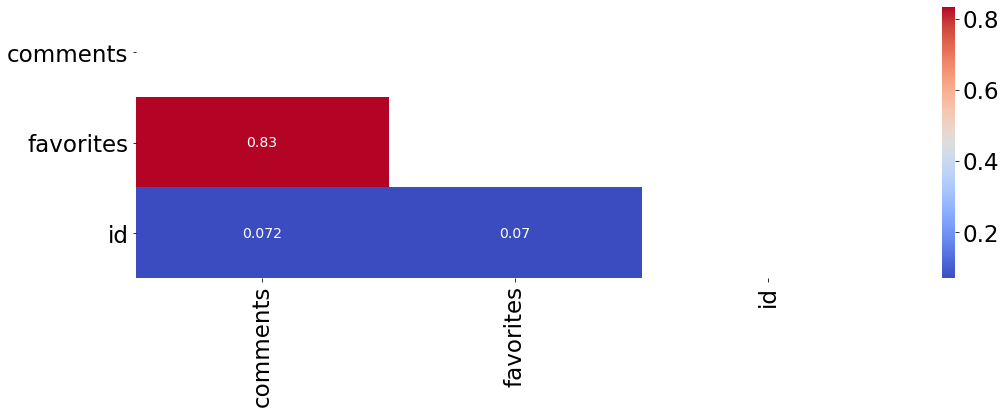

In [68]:
corr=ARTIST_UNIQUE.corr()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr.abs(),annot=True,cmap="coolwarm",mask=mask);
plt.xticks(rotation=90)

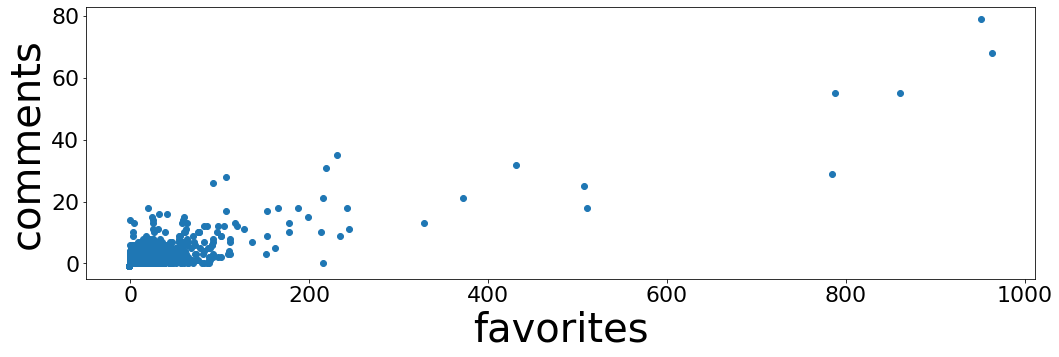

In [69]:

plt.scatter(ARTIST_UNIQUE['favorites'], ARTIST_UNIQUE['comments'])
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('favorites')
plt.ylabel('comments')
plt.show()

In [70]:
ARTIST_UNIQUE['favorites'].describe()

count    16341.000000
mean         3.459703
std         19.837847
min         -1.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        963.000000
Name: favorites, dtype: float64

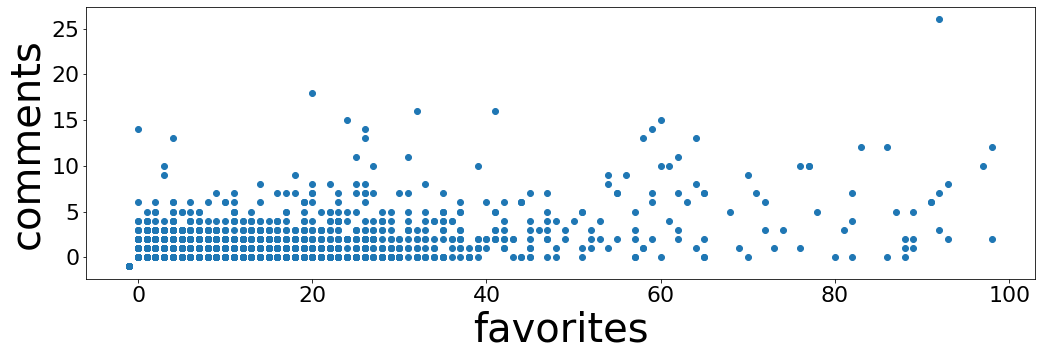

In [71]:
ARTIST_favorites_MINUS_100=ARTIST_UNIQUE.loc[ARTIST_UNIQUE['favorites'] <100]

plt.scatter(ARTIST_favorites_MINUS_100['favorites'], ARTIST_favorites_MINUS_100['comments'])
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('favorites')
plt.ylabel('comments')
plt.show()

## CORRELAZIONE TRA FAVORITES E COMMENTS IN ARTIST 0.83, MA NON COSI CHIARA NELLO SCATTER PLOT, SCENDE A 0.57 SE CONSIDERARIO SOLO GLI ARTIST CON FAVORITIES <100 (elimino solo 42 record!!!!)

(array([0.5, 1.5, 2.5]), <a list of 3 Text major ticklabel objects>)

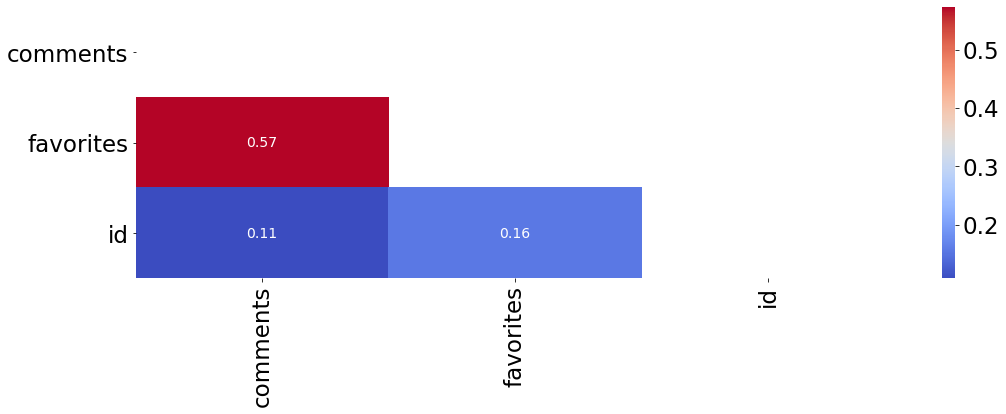

In [72]:
corr=ARTIST_favorites_MINUS_100.corr()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr.abs(),annot=True,cmap="coolwarm",mask=mask);
plt.xticks(rotation=90)

In [73]:
ARTIST_favorites_MINUS_100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16299 entries, 2 to 155314
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   comments   16299 non-null  int64 
 1   favorites  16299 non-null  int64 
 2   id         16299 non-null  int64 
 3   location   5996 non-null   object
 4   name       16299 non-null  object
dtypes: int64(3), object(2)
memory usage: 764.0+ KB


In [74]:
tracks.isnull().sum() 

album   comments             0
        date_released    36280
        favorites            0
        id                   0
        listens              0
        tags                 0
        title             1025
        tracks               0
        type              6508
artist  comments             0
        favorites            0
        id                   0
        location         36364
        name                 0
        tags                 0
set     subset               0
track   bit_rate             0
        comments             0
        duration             0
        favorites            0
        genre_top        56976
        genres               0
        genres_all           0
        interest             0
        license             87
        listens              0
        number               0
        tags                 0
        title                1
dtype: int64

## ANALISI TRACK

In [75]:
track=tracks['track']
track.isnull().sum() 

bit_rate          0
comments          0
duration          0
favorites         0
genre_top     56976
genres            0
genres_all        0
interest          0
license          87
listens           0
number            0
tags              0
title             1
dtype: int64

In [76]:
track.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106574 entries, 2 to 155320
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   bit_rate    106574 non-null  int64   
 1   comments    106574 non-null  int64   
 2   duration    106574 non-null  int64   
 3   favorites   106574 non-null  int64   
 4   genre_top   49598 non-null   category
 5   genres      106574 non-null  object  
 6   genres_all  106574 non-null  object  
 7   interest    106574 non-null  int64   
 8   license     106487 non-null  category
 9   listens     106574 non-null  int64   
 10  number      106574 non-null  int64   
 11  tags        106574 non-null  object  
 12  title       106573 non-null  object  
dtypes: category(2), int64(7), object(4)
memory usage: 10.0+ MB


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text major ticklabel objects>)

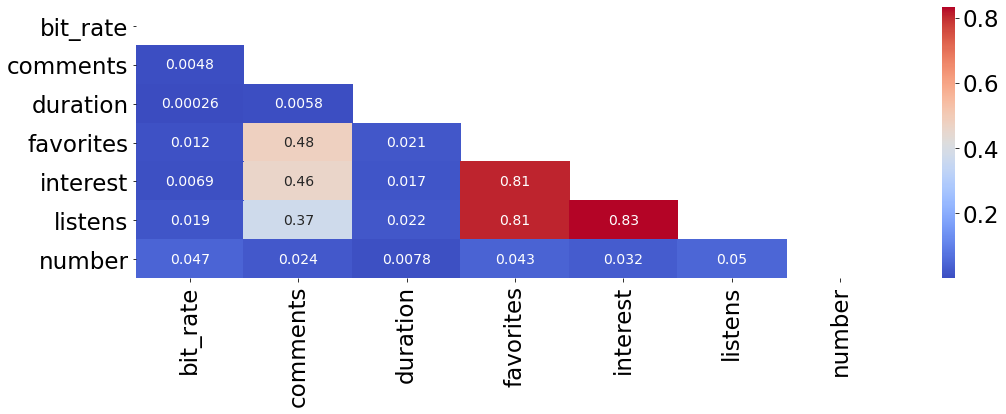

In [77]:
corr=track.corr()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr.abs(),annot=True,cmap="coolwarm",mask=mask);
plt.xticks(rotation=90)

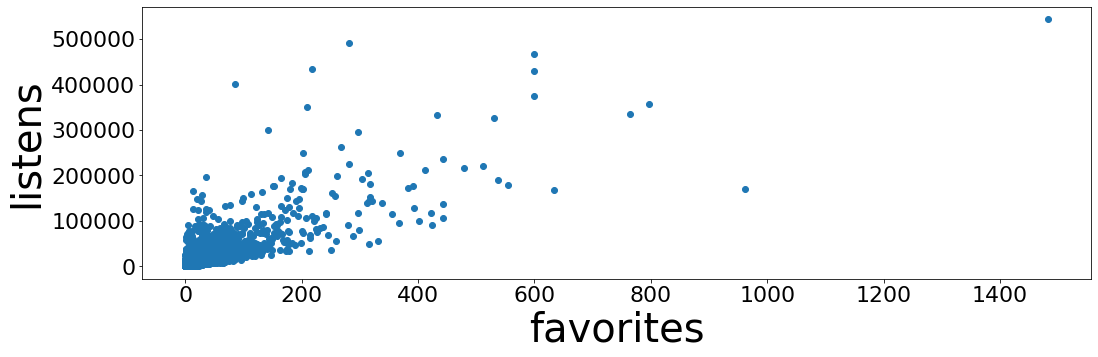

In [78]:
plt.scatter(track['favorites'], track['listens'])
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('favorites')
plt.ylabel('listens')
plt.show()

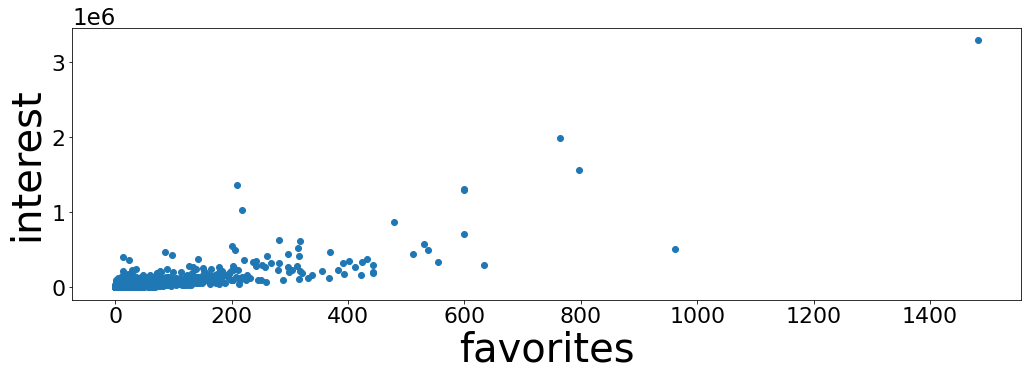

In [79]:
plt.scatter(track['favorites'], track['interest'])
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('favorites')
plt.ylabel('interest')
plt.show()

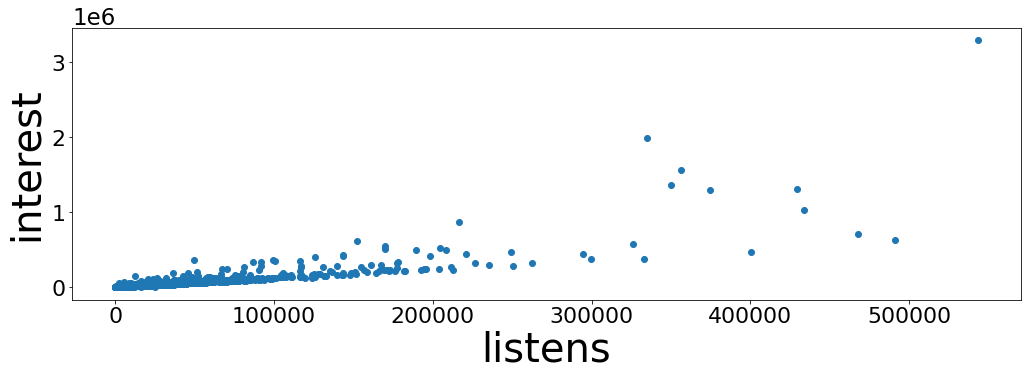

In [80]:
plt.scatter(track['listens'], track['interest'])
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xlabel('listens')
plt.ylabel('interest')
plt.show()

## correlazione tra i 3 attributi di track LISTENS, FAVORITES E INTEREST

In [81]:
track['interest'].describe()

count    1.065740e+05
mean     3.541310e+03
std      1.901743e+04
min      2.000000e+00
25%      5.990000e+02
50%      1.314000e+03
75%      3.059000e+03
max      3.293557e+06
Name: interest, dtype: float64

In [82]:
track['listens'].describe()

count    106574.000000
mean       2329.353548
std        8028.070647
min           0.000000
25%         292.000000
50%         764.000000
75%        2018.000000
max      543252.000000
Name: listens, dtype: float64

In [83]:
tracks

album                                         \
         comments date_released favorites     id listens   
track_id                                                   
2               0    2009-01-05         4      1    6073   
3               0    2009-01-05         4      1    6073   
5               0    2009-01-05         4      1    6073   
10              0    2008-02-06         4      6   47632   
20              0    2009-01-06         2      4    2710   
...           ...           ...       ...    ...     ...   
155316          0    2017-02-17         0  22940    1506   
155317          0    2017-02-17         0  22940    1506   
155318          0    2017-02-17         0  22940    1506   
155319          0    2017-02-17         0  22940    1506   
155320          0    2017-03-26         1  22906    7481   

                                                             \
                                                       tags   
track_id                                                      
2                                                        []   
3                                                        []   
5                                                        []   
10                                                       []   
20                                                       []   
...                                                     ...   
155316                                                   []   
155317                                                   []   
155318                                                   []   
155319                                                   []   
155320    [ballad, epic, rockabilly, curse, hex, hard ro...   

                                                                   artist  \
                                  title tracks              type comments   
track_id                                                                    
2                  AWOL - A Way Of Life      7             Album        0   
3                  AWOL - A Way Of Life      7             Album        0   
5                  AWOL - A Way Of Life      7             Album        0   
10                    Constant Hitmaker      2             Album        3   
20                                Niris     13             Album        2   
...                                 ...    ...               ...      ...   
155316    Live at Monty Hall, 2/17/2017      6  Live Performance        0   
155317    Live at Monty Hall, 2/17/2017      6  Live Performance        0   
155318    Live at Monty Hall, 2/17/2017      6  Live Performance        0   
155319    Live at Monty Hall, 2/17/2017      6  Live Performance        0   
155320        What I Tell Myself Vol. 2     11             Album        1   

          ...     track                                                       \
          ... favorites genre_top         genres         genres_all interest   
track_id  ...                                                                  
2         ...         2   Hip-Hop           [21]               [21]     4656   
3         ...         1   Hip-Hop           [21]               [21]     1470   
5         ...         6   Hip-Hop           [21]               [21]     1933   
10        ...       178       Pop           [10]               [10]    54881   
20        ...         0       NaN      [76, 103]  [17, 10, 76, 103]      978   
...       ...       ...       ...            ...                ...      ...   
155316    ...         1      Rock           [25]           [25, 12]      122   
155317    ...         1      Rock           [25]           [25, 12]      194   
155318    ...         2      Rock           [25]           [25, 12]      214   
155319    ...         0      Rock           [25]           [25, 12]      336   
155320    ...         1       NaN  [10, 12, 169]   [169, 10, 12, 9]      972   

                                                                            \
          

In [84]:
tracks.loc[124857]

album   comments                                                         0
        date_released                                  2006-02-06 00:00:00
        favorites                                                        0
        id                                                           18862
        listens                                                      55904
        tags                                                            []
        title                                         Do You Know The Word
        tracks                                                          14
        type                                                         Album
artist  comments                                                         0
        favorites                                                        8
        id                                                           20818
        location                                                       NaN
        name             

In [89]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106574 entries, 2 to 155320
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   (album, comments)       106574 non-null  int64         
 1   (album, date_released)  70294 non-null   datetime64[ns]
 2   (album, favorites)      106574 non-null  int64         
 3   (album, id)             106574 non-null  int64         
 4   (album, listens)        106574 non-null  int64         
 5   (album, tags)           106574 non-null  object        
 6   (album, title)          105549 non-null  object        
 7   (album, tracks)         106574 non-null  int64         
 8   (album, type)           100066 non-null  category      
 9   (artist, comments)      106574 non-null  int64         
 10  (artist, favorites)     106574 non-null  int64         
 11  (artist, id)            106574 non-null  int64         
 12  (artist, location)      70210 

In [85]:
smallSet=tracks.loc[tracks[('set','subset')] == 'small']

In [86]:
mediumSet=tracks.loc[tracks[('set','subset')] == 'medium']

In [87]:
largeSet=tracks.loc[tracks[('set','subset')] == 'large']

In [93]:
smallSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 2 to 155066
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   (album, comments)       8000 non-null   int64         
 1   (album, date_released)  5337 non-null   datetime64[ns]
 2   (album, favorites)      8000 non-null   int64         
 3   (album, id)             8000 non-null   int64         
 4   (album, listens)        8000 non-null   int64         
 5   (album, tags)           8000 non-null   object        
 6   (album, title)          8000 non-null   object        
 7   (album, tracks)         8000 non-null   int64         
 8   (album, type)           7769 non-null   category      
 9   (artist, comments)      8000 non-null   int64         
 10  (artist, favorites)     8000 non-null   int64         
 11  (artist, id)            8000 non-null   int64         
 12  (artist, location)      5471 non-null   object

In [94]:
mediumSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17000 entries, 3 to 155314
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   (album, comments)       17000 non-null  int64         
 1   (album, date_released)  11755 non-null  datetime64[ns]
 2   (album, favorites)      17000 non-null  int64         
 3   (album, id)             17000 non-null  int64         
 4   (album, listens)        17000 non-null  int64         
 5   (album, tags)           17000 non-null  object        
 6   (album, title)          17000 non-null  object        
 7   (album, tracks)         17000 non-null  int64         
 8   (album, type)           16568 non-null  category      
 9   (artist, comments)      17000 non-null  int64         
 10  (artist, favorites)     17000 non-null  int64         
 11  (artist, id)            17000 non-null  int64         
 12  (artist, location)      11510 non-null  objec

In [90]:
largeSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81574 entries, 20 to 155320
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   (album, comments)       81574 non-null  int64         
 1   (album, date_released)  53202 non-null  datetime64[ns]
 2   (album, favorites)      81574 non-null  int64         
 3   (album, id)             81574 non-null  int64         
 4   (album, listens)        81574 non-null  int64         
 5   (album, tags)           81574 non-null  object        
 6   (album, title)          80549 non-null  object        
 7   (album, tracks)         81574 non-null  int64         
 8   (album, type)           75729 non-null  category      
 9   (artist, comments)      81574 non-null  int64         
 10  (artist, favorites)     81574 non-null  int64         
 11  (artist, id)            81574 non-null  int64         
 12  (artist, location)      53229 non-null  obje

In [96]:
largeSet[('track','genre_top')].value_counts()

Experimental           8357
Rock                   7079
Electronic             3058
Hip-Hop                1351
Folk                   1284
Pop                    1146
Instrumental            729
Classical               611
International           371
Spoken                  305
Jazz                    187
Old-Time / Historic      44
Blues                    36
Soul-RnB                 21
Country                  16
Easy Listening            3
Name: (track, genre_top), dtype: int64